<a href="https://colab.research.google.com/github/SilahicAmil/Dog-Vision/blob/master/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end multi-class Dog Breed Classification

This notebook builds and end to end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub

## Problem

Identifying the breed of a dog given and image of a dog.

When i'm scrolling through Instagram and see a cute dog. I want to know what breed of dog it is.

## Data

The data we're using is from Kaggle's Dog Breed identification competition

https://www.kaggle.com/c/dog-breed-identification

## Evalation

The evalution is a file with prediction probablities for each dog breed of each test image

## Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning
* There is  120 breeds of dogs (Meaning we have 120 different classes)
* There are around 10,000+ images in the training set (Labeled)
* There are around 10,000+ images in the test set (No labels. Because this is what we are predicting/testing on)



In [ ]:
# Unzip the data into Google Drive
# !unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

### Getting our workspace ready

* Import TensorFlow 2.x - DONE
* Import TensorFlow Hub - DONE
* Make sure we're using a GPU - DONE

In [ ]:
# Import TensorFlow into Colab
import tensorflow as tf
print("TF Version", tf.__version__)

# Importing necessary tools
import tensorflow_hub as hub
print("Tf Hub Version:", hub.__version__)

# Check for GPU availability
print("GPU", "available()" if tf.config.list_physical_devices("GPU") else "Not available :(")

TF Version 2.5.0
Tf Hub Version: 0.12.0
GPU available()


## Getting the data ready turning it into tensors

With all machine learning models, our data has to be in numerical format. Sot aths what we'll be doing firs. Turning our images into Tensors (Numerical Resprentation)

Starting by acessing our data and checking out the labels

In [ ]:
# Checkout the labels of data

import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     601bb80886380047cd3b8ffdb9654d62  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


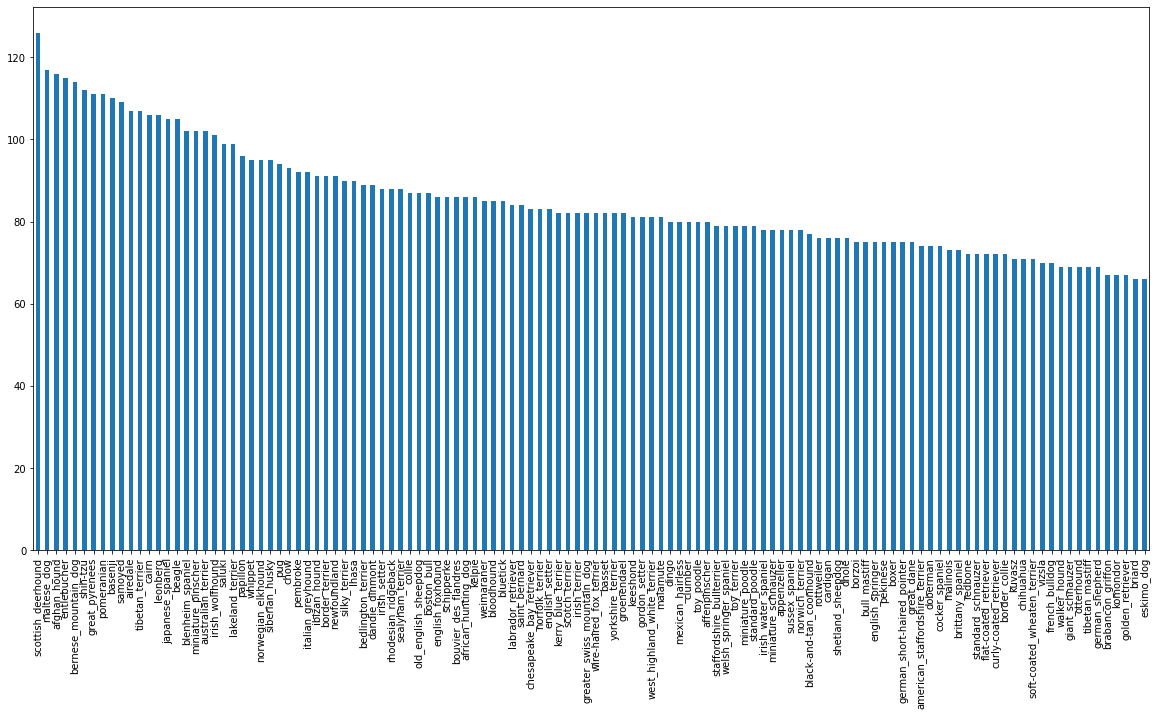

In [ ]:
# How many images are there per class(breed)

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))


In [ ]:
labels_csv["breed"].value_counts().median()

82.0

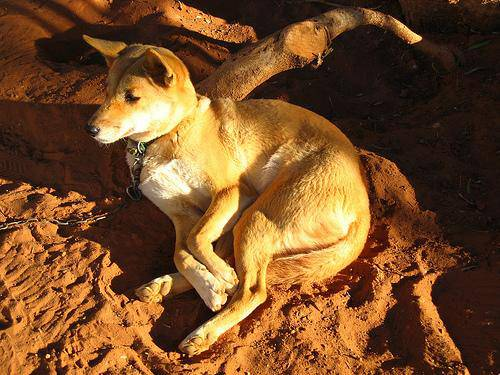

In [ ]:
# Viewing an image

from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their labels

Get a list of all our image file pathnames

In [ ]:
labels_csv.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create path names from image ID
filenames =["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]


# Check the first ten
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual iamge files
import os

if len(os.listdir("drive/MyDrive/Dog Vision/train")) == len(filenames):
  print("Filenames amtch actual amount of files. Go forward")
else:
  print("Filenames do not match amount of files, check the target directory")

Filenames amtch actual amount of files. Go forward


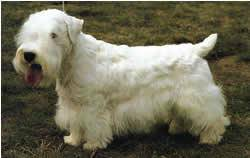

In [ ]:
Image(filenames[6969])

In [ ]:
labels_csv["breed"][6969]

'sealyham_terrier'

Since we've now got our training imge filepaths in a list, let's prepare our labels


In [ ]:
import numpy as np

labels = labels_csv["breed"].to_numpy()
# labels =np.array(labels) Does same thing as above
labels
len(labels)

10222

Check if number fo matches the number of file names

In [ ]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames


In [ ]:
# Find unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

10222

In [ ]:
# Example : Turning boolean array into intergers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(boolean_labels[5].astype(int))

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:5]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

### Creating our own validation set 

1.   Since this Kaggle set didn't come with a validation set. Let's make our own



In [ ]:
# Setup X and y variables

X = filenames # Filepath with the image
y = boolean_labels # Dog Breed type

In [ ]:
len(X)

10222

In [ ]:
len(y)

10222

We're going to start with a ~1000 images and increase as needed

In [ ]:
# set number of images ot use for experimenting

NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max:1000, step:1000}

In [ ]:
# Splitting data (Train test split)

from sklearn.model_selection import train_test_split

# Split inot training and validation of total size of NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Lets have a look at the training data

X_train[:2], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing images (Turning images into Tensors)

To preprocess images into Tensors w're going to write a function to do a few things

1. Take an image file path as inputs
2. Use TensorFlow to read the file and save it as a variable `image`
3. Turn out `image` into tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`

In [ ]:
# Convert an image to an np array
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
# Turn image into a Tensor

tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns into a tensor
  """

  # Read in a image file

  image = tf.io.read_file(image_path)

  # Turn image into numerical tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image,channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values

  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image (224,224)
   
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data in batches

Why turn our data into batches?

Trying to process 10k+ images in one go. They all might not fit in memory (RAM)

So that's why we do 32 (batch size )at a time.

In order to use TensorFlow effectively we need our data in Tensor tuples which looke like this:
`(image,label)`


In [ ]:
# Create a simple function to return a tuple of tensors

def get_image_label(image_path, label):
  """
  Takes an image path name and associated label, process the image and returns the tuple
  """


  image = process_image(image_path)
  return image, label


In [ ]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now e've got a way to turn our data into tuples of Tensors in the form of `(image,label)` . Let's make a function to turn all of our data (X,y) into batches

In [ ]:
# Define the batch size, 32 is a good start

BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it it's validation data.
  Also accepts test data as input (no labels)
  """

  # If the data is a test data set, we probably don't have label
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # IF the data is a valid data set, we don't need to shuffle it
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # Filepaths
                                               tf.constant(y))) # Labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # Fileaths
                                               tf.constant(y))) # Labels
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling after. Shuffle data in the smaller format always. Saves time and efficiency
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples
    data = data.map(get_image_label)                                       
                                              
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
#Create training and validation  data batches

train_data = create_data_batches (X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of tyhe data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, jhowever these can be a little hard to undestand. Let's visualize them


In [ ]:
import matplotlib.pyplot as plt

# Create a fuctiojn fr viewing images in a data batches

def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """

  # Setup the figuyre

  plt.figure(figsize=(10,10))

  #Loop through 25 images
  for i in range(25):
    # Create subplots 5 rows 5 columns
    ax = plt.subplot(5,5, i+1)

    # Display an image
    plt.imshow(images[i])

    # Add image label as title
    plt.title(unique_breeds[labels[i].argmax()])

    #Turn grid lines off
    plt.axis("off")

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

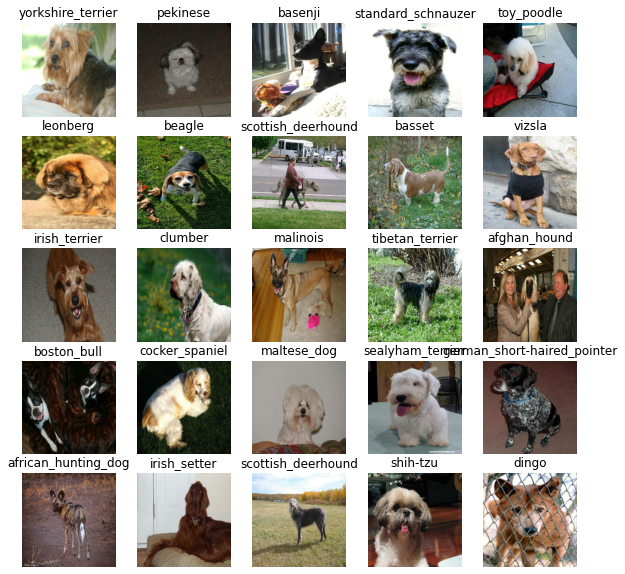

In [ ]:
# Now lets visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

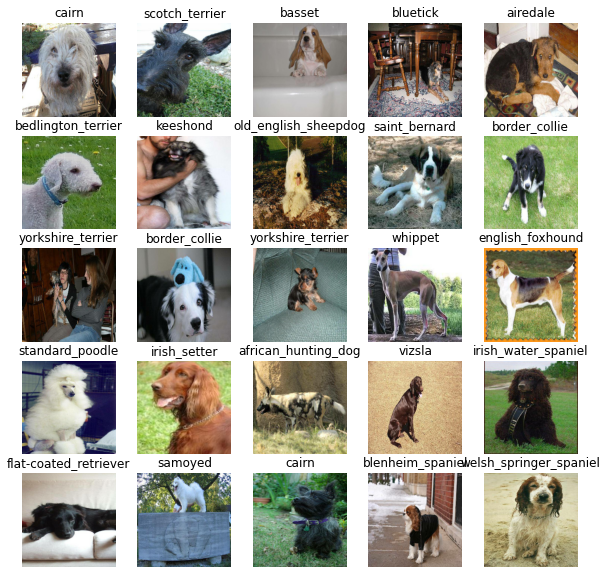

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model

Before we build a model, there are a few things we need to define:
* The input shape (our iamges shape in the form of Tensor) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use

In [ ]:
# Setup input shape to the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, Width, Colour Channels

# Setup otput shape of our model

OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

 Now we've got our inputs outputs and model ready. Let's put them together into a Keras deep learning model

 Let's create a function which:
 * Takes the input shape, output shape and the model we've chosen as apramters
 * Defines the alyers in a keras model in a sequential fashion
 * Compiles the model (says it should be evaluated and improved)
 * Builds the model (tells the model the input shape it'll be getting)
 * Returns the model


 All of these steps can be found [here](https://www.tensorflow.org/guide/keras/sequential_model)

In [ ]:
# Create a function whic builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the layers

  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (Input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 Output Layer
  ])
  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model

  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
outputs = np.ones(shape=(1,1,120))
outputs

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1.]]])

## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save the progress. Checks the progress. or stops training early if a model stops imroving

We'll create two callbacks. One for TensorBoard which helps track the models progress and another for early stopping which precvents our model form training too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension - DONE
2. Crate a TensorBoard callback which is able to save logs to a directory and pass it to our mode's `fit()` function. - DONE
3. Visualize our models training logs with the `%tensorboard` magic function (after model training)

In [ ]:
# load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to create a TensorBoard call back

def create_tensorboard_callback():
  # Create a log directory for storing logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        # Makte it so the logs get tracked whenever we run an experiment
                        datetime.dateime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping Callback

early stopping helps stop our model form overfitting by stopping training if a certain evaluation metrics stops

In [ ]:
# Crreate early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)